### **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import warnings
warnings.filterwarnings("ignore")


### **IMPORT DATA**

In [2]:
data = pd.read_csv("loan_data.csv")

### **DISPLAY DATA**

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
print(' Num of rows :',data.shape[0],'\n','Num of columns :',data.shape[1])

 Num of rows : 381 
 Num of columns : 13


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,381,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,278,325,149,271


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [9]:
data.duplicated().sum()

0

### **CHECKING NULL VALUES**

In [10]:
print("\nNull Values Before Imputation:\n", data.isnull().sum())


Null Values Before Imputation:
 Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    data[col].fillna(data[col].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

print("\nNull Values After Imputation:\n", data.isnull().sum())



Null Values After Imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [12]:
data['Dependents'].value_counts()

Dependents
0     242
2      59
1      52
3+     28
Name: count, dtype: int64


## **Encode categorical features**

In [13]:
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

In [14]:
data['Loan_Status_encoded'] = label_encoder.fit_transform(data['Loan_Status'])

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_encoded
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,1


## **PERFORMING EDA**

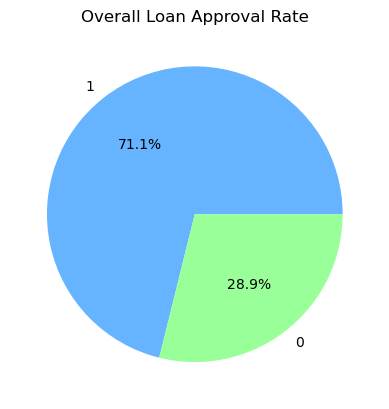

In [16]:
# Overall approval rate
approval_counts = data['Loan_Status'].value_counts()
plt.pie(approval_counts, labels=approval_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Overall Loan Approval Rate')
plt.show()

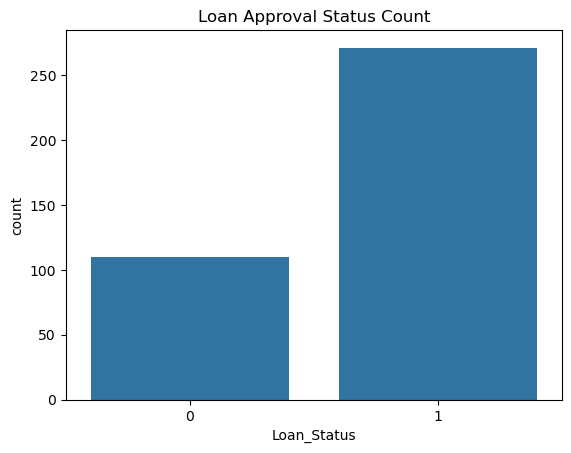

In [17]:
#Loan Status Count
sns.countplot(data=data, x='Loan_Status')
plt.title('Loan Approval Status Count')
plt.show()

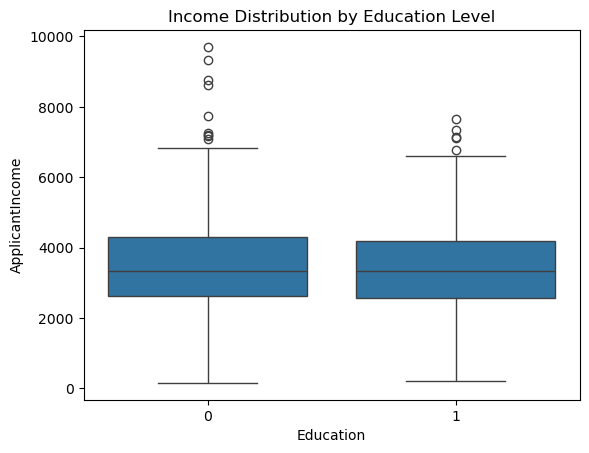

In [18]:
#  Income Distribution by Education
sns.boxplot(data=data, x='Education', y='ApplicantIncome')
plt.title('Income Distribution by Education Level')
plt.show()

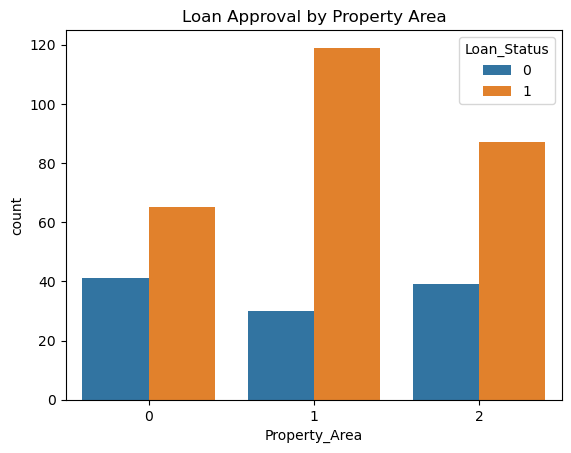

In [19]:
#  Loan Status by Property Area
sns.countplot(data=data, x='Property_Area', hue='Loan_Status')
plt.title('Loan Approval by Property Area')
plt.show()

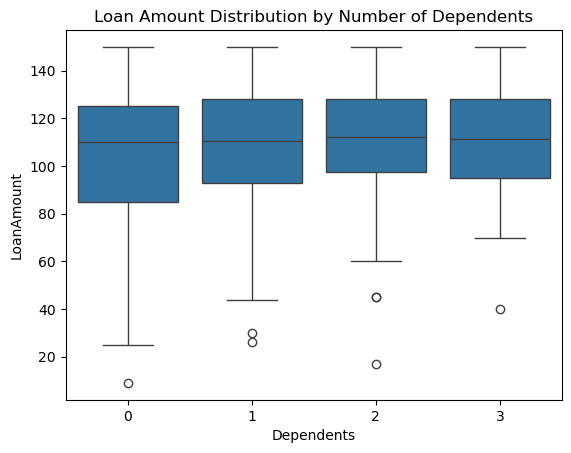

In [20]:
#  Loan Amount by Dependents
sns.boxplot(data=data, x='Dependents', y='LoanAmount')
plt.title('Loan Amount Distribution by Number of Dependents')
plt.show()


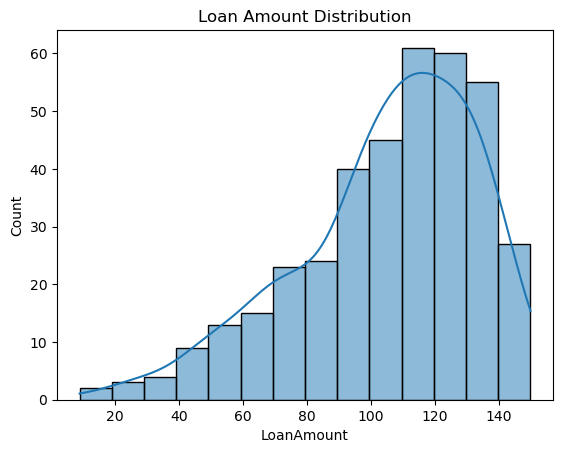

In [21]:
# Loan Amount Distribution
sns.histplot(data=data, x='LoanAmount', kde=True)
plt.title('Loan Amount Distribution')
plt.show()

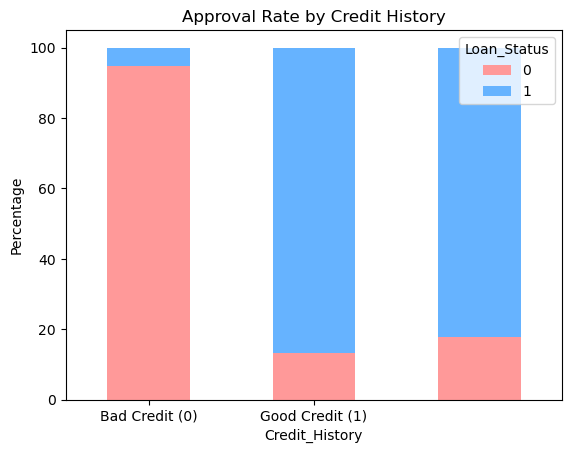

In [22]:
# Credit History vs Loan Status
credit_approval = pd.crosstab(data['Credit_History'], data['Loan_Status'], normalize='index') * 100
credit_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Credit History')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Bad Credit (0)', 'Good Credit (1)'], rotation=0)
plt.show()

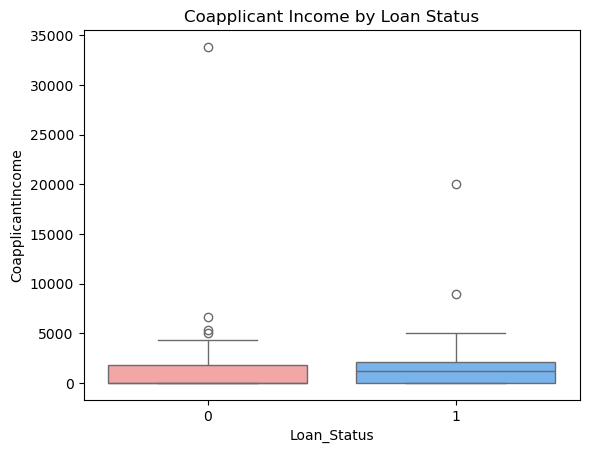

In [23]:
# Coapplicant Income by Loan Status
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data, palette=['#ff9999','#66b3ff'])
plt.title('Coapplicant Income by Loan Status')
plt.show()

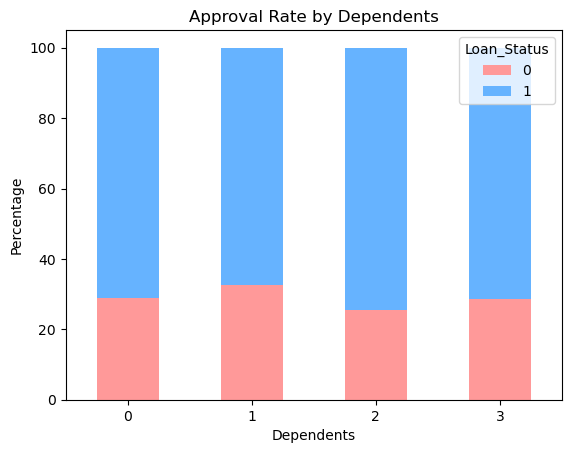

In [24]:
# APPROVAL RATE BY DEPENDENTS
dependents_approval = pd.crosstab(data['Dependents'], data['Loan_Status'], normalize='index') * 100
dependents_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Dependents')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

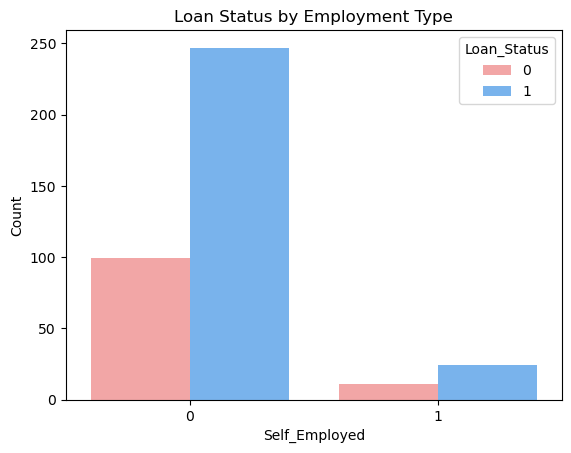

In [25]:
# Employment vs Loan Status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data, palette=['#ff9999','#66b3ff'])
plt.title('Loan Status by Employment Type')
plt.ylabel('Count')
plt.show()

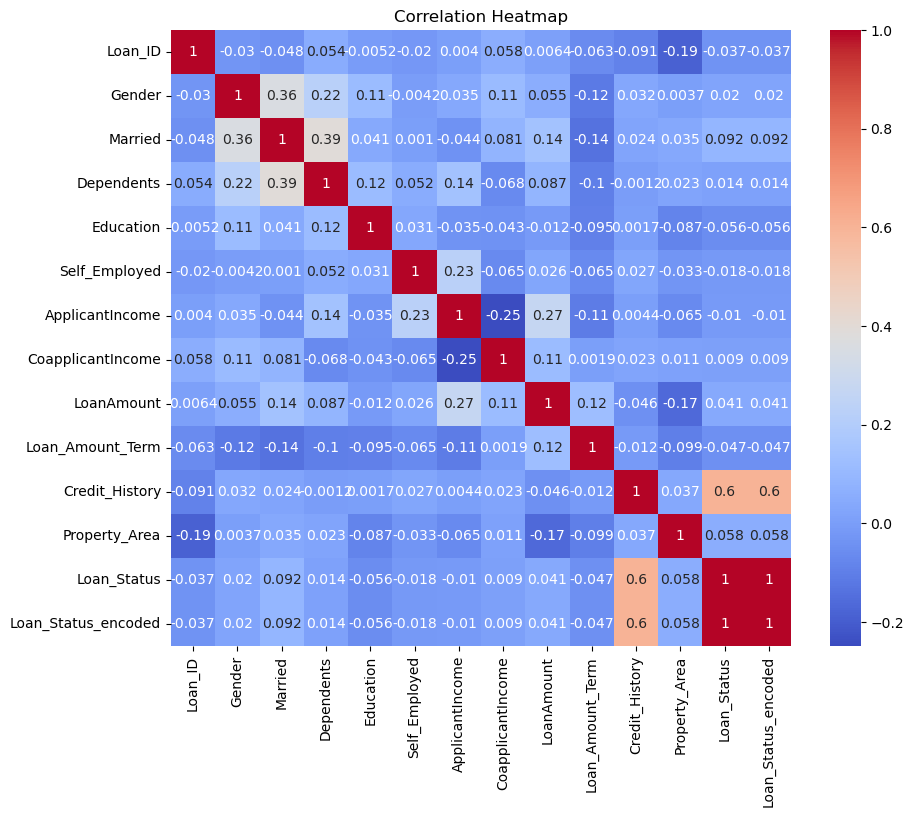

In [26]:
#  Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **MODEL TRAINING**

In [27]:
# Prepare features and target
X = data.drop(['Loan_Status', 'Loan_Status_encoded', 'Loan_ID'], axis=1)
y = data['Loan_Status_encoded']

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create model with class weight balanced
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [30]:
# Evaluate Accuracy
print("\n\u2705 Training Accuracy:", round(rf_model.score(X_train, y_train), 2))
print("\u2705 Test Accuracy:", round(rf_model.score(X_test, y_test), 2))



✅ Training Accuracy: 1.0
✅ Test Accuracy: 0.81


In [31]:
# Classification report
y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.80      0.98      0.88        56

    accuracy                           0.81        77
   macro avg       0.84      0.66      0.68        77
weighted avg       0.82      0.81      0.77        77



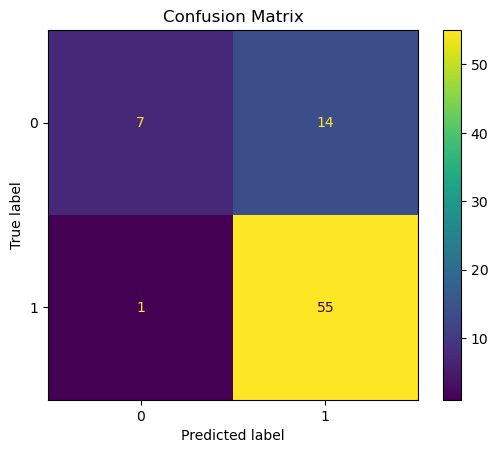

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

In [33]:
# ROC-AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("\nROC-AUC Score:", round(roc_auc_score(y_test, y_pred_prob), 2))



ROC-AUC Score: 0.78


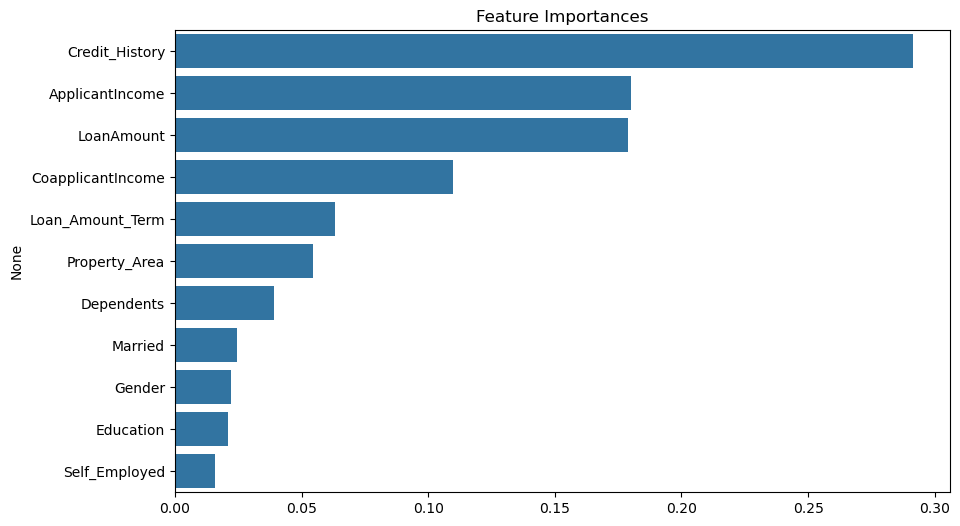

In [34]:
# Feature Importance
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.show()

In [35]:
joblib.dump(rf_model, "loan_model.joblib")
print("✅ Model saved as loan_model.joblib")


✅ Model saved as loan_model.joblib
